#*M4 Practice Hackathon*

##*Libraries*

In [ ]:
!pip install --upgrade -q scikit-learn pycaret xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.4 MB/s eta 0:00:00
   ━━━━

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, auc


##*Data Acquisition*

In [ ]:
# Read in training data
drive_url = "https://drive.google.com/file/d/1J70Sz3_t7znOFZaDHe3SEtpJ69qCUyZy/view?usp=sharing"

# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        24.0          male           Master        58914.0               2   
1        23.0        female      High School        45873.0               2   
2        29.0        female           Master       240947.0               7   
3        30.0        female         Bachelor        96316.0              10   
4        29.0          male         Bachelor        73033.0               7   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                   OWN     4400.0     VENTURE           5.99   
1                  RENT    11000.0     VENTURE          11.01   
2              MORTGAGE    10000.0     VENTURE          12.69   
3              MORTGAGE     6000.0     MEDICAL          13.49   
4              MORTGAGE     8000.0    PERSONAL          10.51   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.07                         4.0           656  

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36000 entries, 0 to 35999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      36000 non-null  float64
 1   person_gender                   36000 non-null  object 
 2   person_education                36000 non-null  object 
 3   person_income                   36000 non-null  float64
 4   person_emp_exp                  36000 non-null  int64  
 5   person_home_ownership           36000 non-null  object 
 6   loan_amnt                       36000 non-null  float64
 7   loan_intent                     36000 non-null  object 
 8   loan_int_rate                   36000 non-null  float64
 9   loan_percent_income             36000 non-null  float64
 10  cb_person_cred_hist_length      36000 non-null  float64
 11  credit_score                    36000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
# Read in test data
drive_url = "https://drive.google.com/file/d/1X7Ezau9dfp1BKYyolYEVZzGQqobtEpGn/view?usp=sharing"
# Convert the Google Drive URL to a direct download URL
file_id = drive_url.split('/d/')[1].split('/')[0]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Read the CSV file into a DataFrame
df_test = pd.read_csv(download_url)

# Display the first few rows of the DataFrame
print(df_test.head())


   person_age person_gender person_education  person_income  person_emp_exp  \
0        25.0        female         Bachelor        84973.0               2   
1        24.0          male         Bachelor        87280.0               2   
2        22.0        female        Associate        70178.0               0   
3        27.0          male         Bachelor       176144.0               1   
4        26.0        female         Bachelor       181548.0               3   

  person_home_ownership  loan_amnt        loan_intent  loan_int_rate  \
0              MORTGAGE    14000.0            VENTURE           5.42   
1                   OWN    16000.0          EDUCATION          12.42   
2                   OWN     6500.0            VENTURE           7.49   
3              MORTGAGE     2500.0            MEDICAL           8.49   
4              MORTGAGE    10000.0  DEBTCONSOLIDATION          15.99   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.16  

##*Exploratory Data Analysis*

In [ ]:
# Check class imbalance
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


<Axes: xlabel='person_income'>

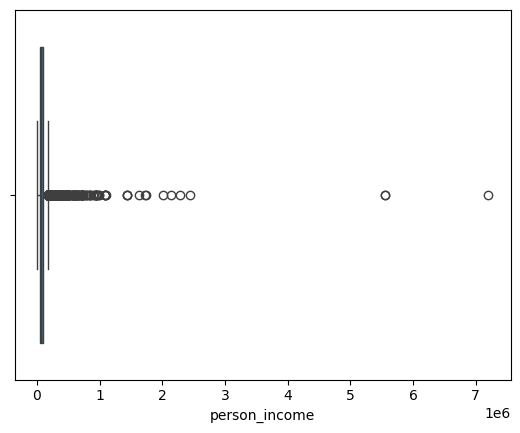

In [ ]:
# Outlier detection
sns.boxplot(x=df['person_income'])

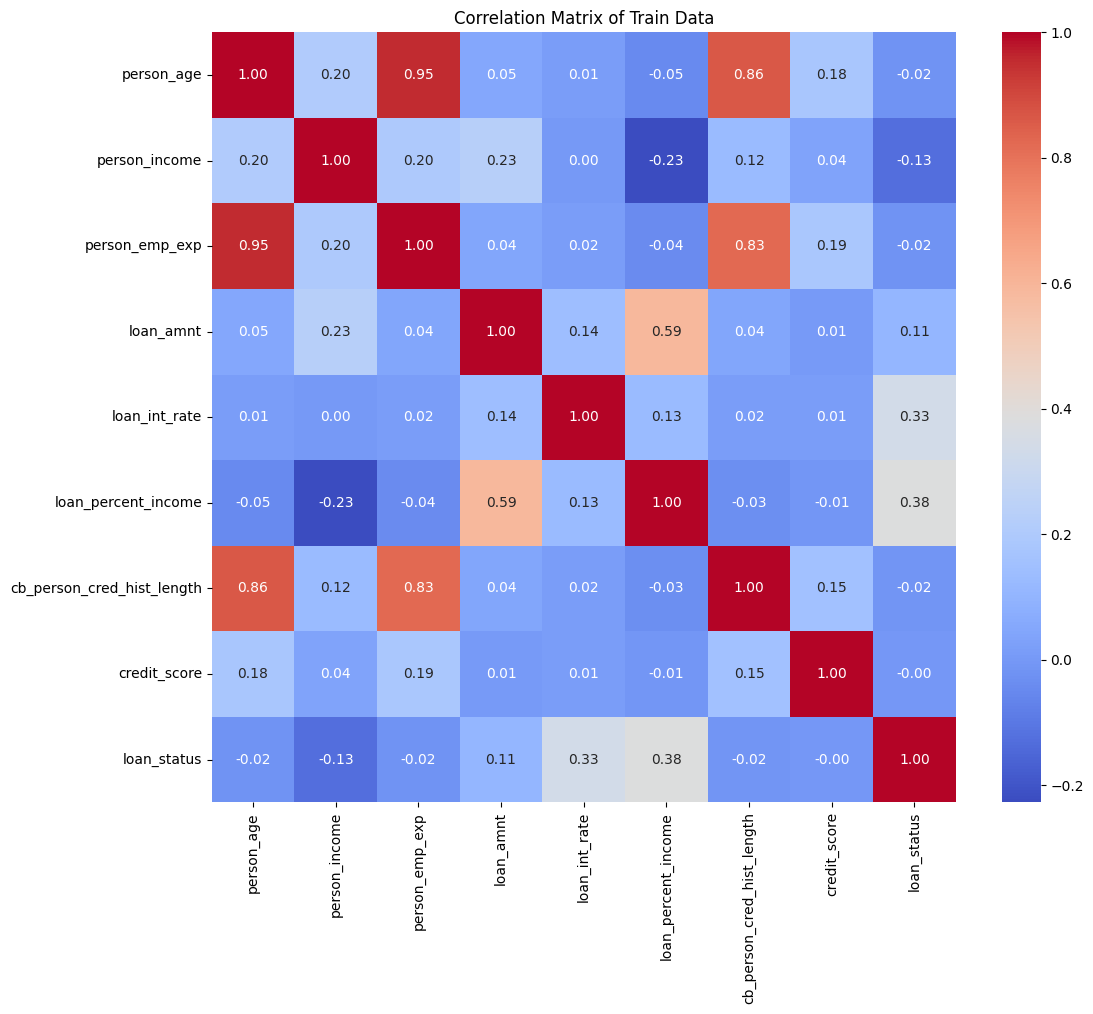

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Train Data')
plt.show()

##*Engineering*

In [ ]:
categorical_features = ['person_gender', 'person_home_ownership', 'loan_intent', 'person_education']

df = pd.get_dummies(df, columns=categorical_features, drop_first=True)
df_test = pd.get_dummies(df_test, columns=categorical_features, drop_first=True)

In [ ]:
# Mapping Yes: 1, No: 0
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})
df_test['previous_loan_defaults_on_file'] = df_test['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [ ]:
# Binning ages
# Bins are a bit arbitrary
bins = [18, 25, 35, 50, 100]
labels = ['Young', 'Mid-Age', 'Adult', 'Senior']

df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels)
df_test['age_group'] = pd.cut(df_test['person_age'], bins=bins, labels=labels)

# Convert age_group to one-hot encoding
df = pd.get_dummies(df, columns=['age_group'], drop_first=True)
df_test = pd.get_dummies(df_test, columns=['age_group'], drop_first=True)

In [ ]:
# Debt-to-Income Ratio
df['debt_to_income_ratio'] = df['loan_amnt'] / df['person_income']
df_test['debt_to_income_ratio'] = df_test['loan_amnt'] / df_test['person_income']


# Income per Years of Employment
df['income_per_years_emp'] = df['person_income'] / (df['person_emp_exp'] + 1)
df_test['income_per_years_emp'] = df_test['person_income'] / (df_test['person_emp_exp'] + 1)


# Loan Interest Burden
df['loan_interest_burden'] = df['loan_amnt'] * df['loan_int_rate'] / 100
df_test['loan_interest_burden'] = df_test['loan_amnt'] * df_test['loan_int_rate'] / 100

df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,0,...,False,False,False,True,False,False,False,0.074685,19638.000,263.56
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,0,...,False,False,True,False,False,False,False,0.239792,15291.000,1211.10
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,0,...,False,False,False,True,True,False,False,0.041503,30118.375,1269.00
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,0,...,True,False,False,False,True,False,False,0.062295,8756.000,809.40
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,0,...,True,False,False,False,True,False,False,0.109540,9129.125,840.80


In [ ]:
scaler = StandardScaler()
numerical_features = ['person_income', 'loan_amnt', 'credit_score', 'loan_int_rate',
                      'loan_percent_income', 'debt_to_income_ratio', 'income_per_years_emp', 'loan_interest_burden']

# Fit scaler only on training data
scaler.fit(df.head()[numerical_features])

# Apply transformation
df.head()[numerical_features] = scaler.transform(df.head()[numerical_features])
df_test[numerical_features] = scaler.transform(df_test[numerical_features])

In [ ]:
df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,0,...,False,False,False,True,False,False,False,0.074685,19638.000,263.56
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,0,...,False,False,True,False,False,False,False,0.239792,15291.000,1211.10
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,0,...,False,False,False,True,True,False,False,0.041503,30118.375,1269.00
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,0,...,True,False,False,False,True,False,False,0.062295,8756.000,809.40
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,0,...,True,False,False,False,True,False,False,0.109540,9129.125,840.80


In [ ]:
df['loan_status'].value_counts(normalize=True)

,proportion
loan_status,
0,0.777778
1,0.222222


##*Classifier #1*

In [ ]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
import pandas as pd

# Define the resampling method
resampling_method = "SMOTE+undersampling"  # Options: "SMOTE", "BorderlineSMOTE", "ADASYN", "undersampling", "SMOTE+undersampling"

# Prepare feature matrix and target variable
X = df.drop(columns=['loan_status']).copy()
y = df['loan_status'].copy()

# Check for any missing values before resampling
assert X.isnull().sum().sum() == 0, "Warning: Missing values detected in X before resampling."

# Choose the resampling method
if resampling_method == "SMOTE":
    resampler = SMOTE(sampling_strategy='auto', random_state=42)
elif resampling_method == "BorderlineSMOTE":
    resampler = BorderlineSMOTE(sampling_strategy='auto', random_state=42)
elif resampling_method == "ADASYN":
    resampler = ADASYN(sampling_strategy='auto', random_state=42)
elif resampling_method == "undersampling":
    resampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
elif resampling_method == "SMOTE+undersampling":
    # First, oversample the minority class using SMOTE
    smote = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust to achieve a 50-50 balance
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Then, undersample the majority class to maintain the 50-50 balance
    undersampler = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
    X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)
else:
    raise ValueError("Invalid resampling method. Choose 'SMOTE', 'BorderlineSMOTE', 'ADASYN', 'undersampling', or 'SMOTE+undersampling'.")

# Apply the selected resampling technique (if not already applied in SMOTE+undersampling)
if resampling_method not in ["SMOTE+undersampling"]:
    X_resampled, y_resampled = resampler.fit_resample(X, y)

# Reindex the resampled data
X_resampled.reset_index(drop=True, inplace=True)
y_resampled.reset_index(drop=True, inplace=True)


# Checking the new class distribution
print(f"Class distribution after {resampling_method}:")
print(y_resampled.value_counts(normalize=True))
print('Shape of X_resampled is ',X_resampled.shape)

# Convert back to DataFrame
df_train_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                                pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

# Display first few rows of the resampled training set
df_train_resampled.head()


Class distribution after SMOTE+undersampling:
loan_status
0    0.5
1    0.5
Name: proportion, dtype: float64
Shape of X_resampled is  (28000, 28)


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_gender_male,...,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden,loan_status
0,35.0,85998.0,12,8000.0,11.49,0.09,6.0,629,1,False,...,False,True,False,True,False,False,0.093025,6615.230769,919.20,0
1,23.0,46827.0,0,8400.0,13.80,0.18,2.0,685,1,True,...,False,True,False,False,False,False,0.179384,46827.000000,1159.20,0
2,29.0,133125.0,6,5000.0,10.01,0.04,9.0,705,1,True,...,False,False,True,True,False,False,0.037559,19017.857143,500.50,0
3,22.0,51044.0,1,5000.0,6.03,0.10,2.0,635,1,False,...,False,True,False,False,False,False,0.097955,25522.000000,301.50,0
4,23.0,69313.0,0,4800.0,10.38,0.07,3.0,662,1,True,...,False,True,False,False,False,False,0.069251,69313.000000,498.24,0


In [ ]:
print(df_train_resampled.duplicated().sum())

0


In [ ]:
# Drop duplicates
df_train_resampled.drop_duplicates(inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Separating features and target variable
X_train_resampled = df_train_resampled.drop(columns=['loan_status']).copy()
y_train_resampled = df_train_resampled['loan_status'].copy()
#X_test = df_test.drop(columns=['loan_status']).copy()  # Ensure loan_status is not included

# Initialize Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X_resampled, y_resampled, cv=cv)
avg_f1_score = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='f1').mean()

# Compute confusion matrices for each fold
conf_matrices = []
for train_idx, test_idx in cv.split(X_resampled, y_resampled):
    model.fit(X_resampled.iloc[train_idx], y_resampled.iloc[train_idx])
    y_fold_pred = model.predict(X_resampled.iloc[test_idx])
    conf_matrices.append(confusion_matrix(y_resampled.iloc[test_idx], y_fold_pred))

# Compute the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Print the average F1 score and confusion matrix
print(f"Average F1 Score: {avg_f1_score:.4f}")
print("Average Confusion Matrix:")
print(avg_conf_matrix)




Average F1 Score: 0.9472
Average Confusion Matrix:
[[2635.4  164.6]
 [ 132.8 2667.2]]


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_gender_male,...,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden,loan_status
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,True,...,False,False,True,False,False,False,0.074685,19638.000,263.56,0
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,False,...,False,True,False,False,False,False,0.239792,15291.000,1211.10,0
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,False,...,False,False,True,True,False,False,0.041503,30118.375,1269.00,0
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,False,...,False,False,False,True,False,False,0.062295,8756.000,809.40,0
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,True,...,False,False,False,True,False,False,0.109540,9129.125,840.80,0


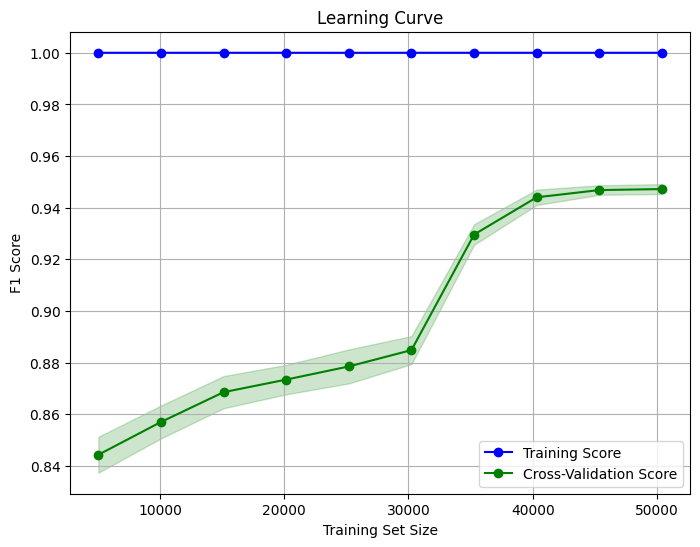

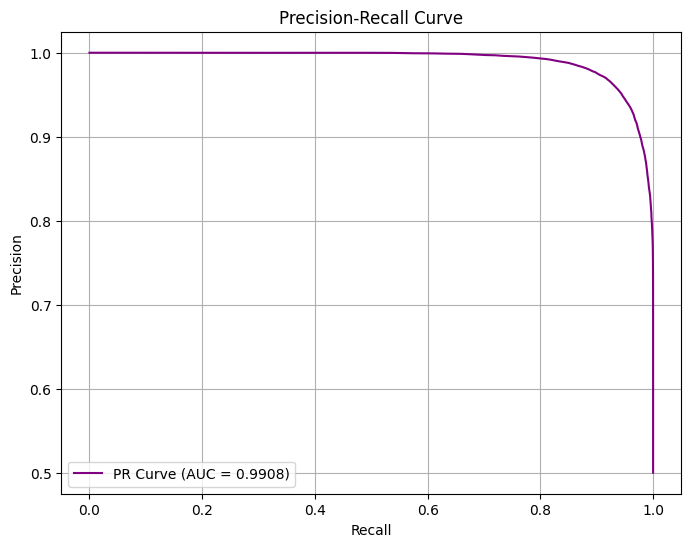

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_gender_male,...,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden,loan_status
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,True,...,False,False,True,False,False,False,0.074685,19638.000,263.56,0
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,False,...,False,True,False,False,False,False,0.239792,15291.000,1211.10,0
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,False,...,False,False,True,True,False,False,0.041503,30118.375,1269.00,0
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,False,...,False,False,False,True,False,False,0.062295,8756.000,809.40,0
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,True,...,False,False,False,True,False,False,0.109540,9129.125,840.80,0


In [ ]:
# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X_resampled, y_resampled, cv=cv, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Generate Precision-Recall Curve
y_prob = cross_val_predict(model, X_resampled, y_resampled, cv=cv, method='predict_proba')[:, 1]
precision, recall, _ = precision_recall_curve(y_resampled, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Display first few rows of the resampled training set
df_train_resampled.head()


In [ ]:
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)


Feature Importance:
                           Feature  Importance
8   previous_loan_defaults_on_file    0.296794
4                    loan_int_rate    0.116662
12      person_home_ownership_RENT    0.093701
25            debt_to_income_ratio    0.075043
1                    person_income    0.071189
5              loan_percent_income    0.070154
27            loan_interest_burden    0.041396
3                        loan_amnt    0.031291
7                     credit_score    0.028689
26            income_per_years_emp    0.026023
0                       person_age    0.020057
6       cb_person_cred_hist_length    0.018965
15             loan_intent_MEDICAL    0.016900
14     loan_intent_HOMEIMPROVEMENT    0.014555
2                   person_emp_exp    0.013495
20    person_education_High School    0.010266
18       person_education_Bachelor    0.009834
9               person_gender_male    0.009031
21         person_education_Master    0.007592
16            loan_intent_PERSONAL    0

##*Classifier #2*

Average F1 Score: 0.8228
Average Confusion Matrix:
[[2736.4   63.6]
 [ 196.3  603.7]]


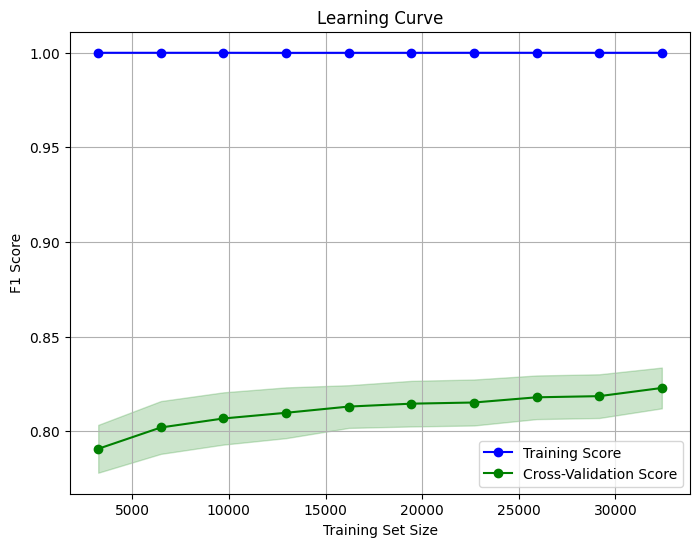

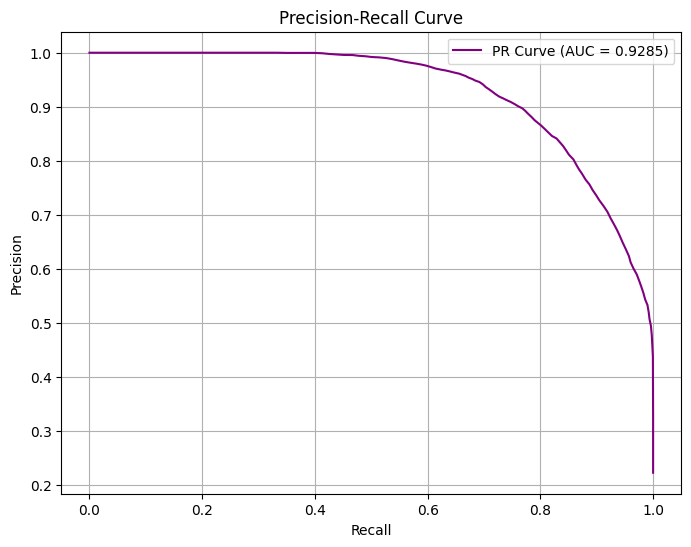

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,0,...,False,False,False,True,False,False,False,0.074685,19638.000,263.56
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,0,...,False,False,True,False,False,False,False,0.239792,15291.000,1211.10
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,0,...,False,False,False,True,True,False,False,0.041503,30118.375,1269.00
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,0,...,True,False,False,False,True,False,False,0.062295,8756.000,809.40
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,0,...,True,False,False,False,True,False,False,0.109540,9129.125,840.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, auc

# Prepare feature matrix and target variable
X = df.drop(columns=['loan_status']).copy()
y = df['loan_status'].copy()

# Check for any missing values before training
assert X.isnull().sum().sum() == 0, "Warning: Missing values detected in X before training."

# Initialize Random Forest Classifier with class weight handling
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_pred = cross_val_predict(model, X, y, cv=cv)
avg_f1_score = cross_val_score(model, X, y, cv=cv, scoring='f1').mean()

# Compute confusion matrices for each fold
conf_matrices = []
for train_idx, test_idx in cv.split(X, y):
    model.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_fold_pred = model.predict(X.iloc[test_idx])
    conf_matrices.append(confusion_matrix(y.iloc[test_idx], y_fold_pred))

# Compute the average confusion matrix
avg_conf_matrix = np.mean(conf_matrices, axis=0)

# Print the average F1 score and confusion matrix
print(f"Average F1 Score: {avg_f1_score:.4f}")
print("Average Confusion Matrix:")
print(avg_conf_matrix)

# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Generate Precision-Recall Curve
y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
precision, recall, _ = precision_recall_curve(y, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Display first few rows of the dataset
df.head()


##*Classifier #3*


Optimal Threshold: 0.6768
Best Average F1 Score: 0.7373
Best Average Confusion Matrix:
[[24691  3309]
 [ 1396  6604]]


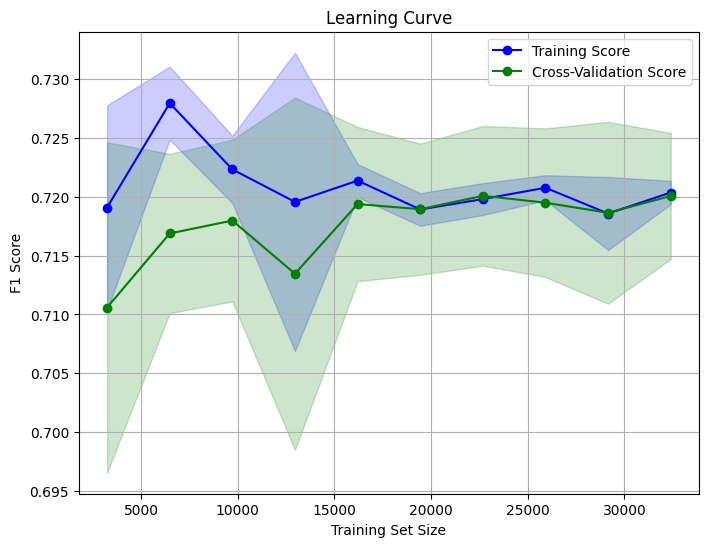

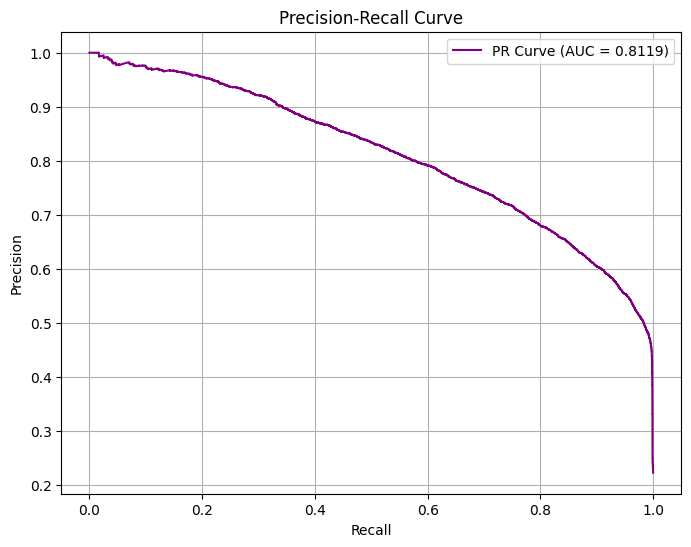

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,...,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,age_group_Mid-Age,age_group_Adult,age_group_Senior,debt_to_income_ratio,income_per_years_emp,loan_interest_burden
0,24.0,58914.0,2,4400.0,5.99,0.07,4.0,656,1,0,...,False,False,False,True,False,False,False,0.074685,19638.000,263.56
1,23.0,45873.0,2,11000.0,11.01,0.24,2.0,634,1,0,...,False,False,True,False,False,False,False,0.239792,15291.000,1211.10
2,29.0,240947.0,7,10000.0,12.69,0.04,9.0,638,1,0,...,False,False,False,True,True,False,False,0.041503,30118.375,1269.00
3,30.0,96316.0,10,6000.0,13.49,0.06,8.0,682,0,0,...,True,False,False,False,True,False,False,0.062295,8756.000,809.40
4,29.0,73033.0,7,8000.0,10.51,0.11,8.0,644,1,0,...,True,False,False,False,True,False,False,0.109540,9129.125,840.80


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, auc

# Prepare feature matrix and target variable
X = df.drop(columns=['loan_status']).copy()
y = df['loan_status'].copy()

# Check for any missing values before training
assert X.isnull().sum().sum() == 0, "Warning: Missing values detected in X before training."

# Initialize Logistic Regression with class weight handling
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
y_prob = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

# Tune the threshold for optimal F1 score
thresholds = np.linspace(0, 1, 100)
best_f1 = 0
best_threshold = 0
best_conf_matrix = None

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    f1 = f1_score(y, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        best_conf_matrix = confusion_matrix(y, y_pred)

# Print optimal threshold and F1 score
print(f"Optimal Threshold: {best_threshold:.4f}")
print(f"Best Average F1 Score: {best_f1:.4f}")
print("Best Average Confusion Matrix:")
print(best_conf_matrix)

# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='f1', train_sizes=np.linspace(0.1, 1.0, 10))

# Compute mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot Learning Curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', marker='o', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', marker='o', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

# Generate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y, y_prob)
pr_auc = auc(recall, precision)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

# Display first few rows of the dataset
df.head()



Feature Importance:
                           Feature  Importance
8   previous_loan_defaults_on_file    5.456891
12      person_home_ownership_RENT    1.566591
17             loan_intent_VENTURE    0.789080
11       person_home_ownership_OWN    0.572927
13           loan_intent_EDUCATION    0.538960
15             loan_intent_MEDICAL    0.345690
14     loan_intent_HOMEIMPROVEMENT    0.321173
4                    loan_int_rate    0.274007
5              loan_percent_income    0.263417
25            debt_to_income_ratio    0.263341
16            loan_intent_PERSONAL    0.177239
22               age_group_Mid-Age    0.140716
2                   person_emp_exp    0.093901
0                       person_age    0.073575
9               person_gender_male    0.050119
20    person_education_High School    0.047355
24                age_group_Senior    0.042406
18       person_education_Bachelor    0.039570
19      person_education_Doctorate    0.023449
10     person_home_ownership_OTHER    0

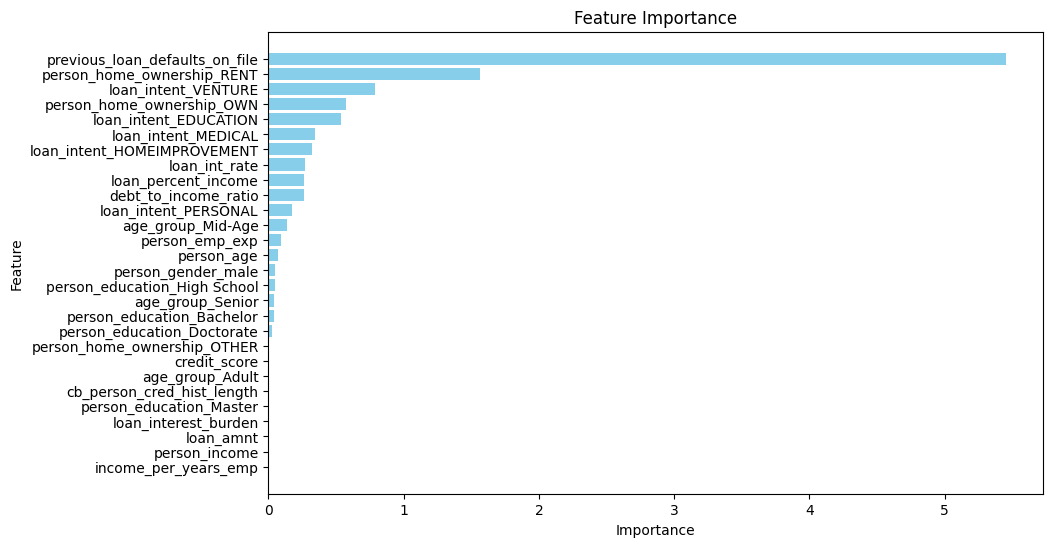

In [ ]:
# Feature Importance (Logistic Regression Coefficients as Importance)
importances = np.abs(model.fit(X, y).coef_)[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


##*Kaggle Submission*

In [ ]:
# Create submit.csv on local drive for submission to Kaggle competition

import pandas as pd

# Assuming final_model is your trained model and X_test is your test dataset
# Generate predictions
predictions = model.predict(df_test)

# Create a DataFrame with ID and TARGET columns
submission_df = pd.DataFrame({
    'ID': range(1, len(df_test) + 1),
    'TARGET': predictions
})

# Save to submit.csv
submission_df.to_csv('submit.csv', index=False)

print("submit.csv file created successfully!")

# # Download the CSV file to local machine
# files.download('submit.csv')



submit.csv file created successfully!
